<a href="https://colab.research.google.com/github/youngmoo/AppliedDSP/blob/main/AppliedDSP_No7_graphics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initialization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
import IPython.display as ipd
%matplotlib inline
from scipy import signal as sig
from scipy import stats
import librosa
import soundfile as sf

from IPython.display import HTML

rc('animation', html='jshtml')
rc('animation', embed_limit=2**30)

path = ''   # Specify a custom path to save output files

In [3]:
# Google drive link to folder 'video7_signals', containing source signals used by this notebook.
# Put a shortcut to this folder at the root level of your Google Drive.
# https://drive.google.com/drive/folders/175mqDQBkbEoxxzgC--xUMXiR6uW5sTkM?usp=sharing
input_path = '/content/drive/MyDrive/video7_signals/'

# Mount your Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Plot style defaults

In [4]:
rc('figure', figsize=(16,4))
rc('figure', facecolor='#111111')

rc('axes', facecolor='#212121')
rc('axes', edgecolor='#212121')
rc('axes', labelcolor='w')
rc('xtick', color='w')
rc('ytick', color='w')
rc('savefig', transparent=True)

rc('font', family='Liberation Serif')
rc('font', size=28)

##FFT animation functions


In [5]:
fs44 = 44100
fps = 30
n_o = 0
f_size = 2048
n_hop = int(fs44/fps)
N_fft = 2048
f = np.arange(N_fft) * fs44 / N_fft

In [6]:
# Initialize parameters
fs44 = 44100          # Sampling rate of 44.1 kHz
fps = 30              # Frames per second (30)
n_o = 0               # Starting sample offset (0)
f_size = 2048         # FFT analysis frame/window size (2048)
n_hop = int(fs44/fps) # FFT hop size (sampling rate / frames-per-second)
N_fft = 2048          # FFT size (2048)
f = np.arange(N_fft) * fs44 / N_fft   # Frequency axis

# First set up the figure, the axis, and the plot element we want to animate
def setupFFTanimation(x_lim=(0,20000), y_lim=(-100,20), fig_size=(20,8), hide_y=False):
  fig = plt.figure(figsize=fig_size)
  ax = plt.axes(xlim=x_lim,ylim=y_lim)
  plt.close()   # Don't output the final figure separately
  line, = ax.plot([], [], 'c', lw=2)

  #ax = plt.axes(frameon=False)
  ax.set_frame_on(False)
  # ax.set_xticks([0,5000,10000,15000,20000])
  #ax.tick_params(length=15,width=2,axis="x",labelsize=28)
  ax.tick_params(length=10,width=2,labelsize=28)
  #ax.tick_params(axis='x', colors='white')
  if save_figures==True:
    ax.tick_params(colors='white')
  for tick in ax.get_xticklabels():
      tick.set_fontname("Liberation Serif")

  if hide_y == False: 
    ax.set_yticks([-100,-50,0])
    for tick in ax.get_yticklabels():
        tick.set_fontname("Liberation Serif")
  else:
    ax.axes.get_yaxis().set_visible(False)

  fig.tight_layout()
  return fig, line

# initialization function: plot the background of each frame
def initFFTanimation():
    line.set_data([], [])
    return (line,)

# animation function. This is called sequentially  
def animateFFT(i, sig, save_fig=False, subdir='none'):
    n1 = int(n_o + n_hop*i)
    n2 = int(n_o + n_hop*i + f_size)

    x_i = sig[n1:n2]
#    X_i = np.fft.fft(x_i, n=N_fft)
    X_i = np.fft.fft(x_i * np.hanning(len(x_i)), n=N_fft)
    X_mag = 20*np.log(np.abs(X_i)) - 50

    line.set_data(f, X_mag)

    if save_fig==True:
        fig.savefig(path + '/' + subdir + '/frame%04d.png' % i, dpi=100, transparent=True)

    return (line,)  

# Linearity plots

## Superposition, $x_k[n] \rightarrow y_k[n]$

In [7]:
def plot_signal(s, color_name='c', filename="", fig_size=[6,2], x_lim=[-0.2,40.2], y_lim=[-0.1,1.1]):

  fig = plt.figure(figsize=fig_size)
  ax = plt.axes(xlim=x_lim, ylim=y_lim)

  ax.plot(s,'o:',markersize=3,lw=1, color=color_name)
  ax.set_frame_on(False)
  ax.xaxis.set_visible(False)
  ax.yaxis.set_visible(False)

  fig.tight_layout()

  if filename != "":
    fig.savefig(path + filename, dpi=100)

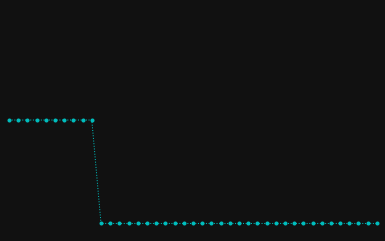

In [8]:
x1 = np.zeros(41)
x1[:10] = 1
#plot_signal(x1, filename="x1[n]", fig_size=[6,4], y_lim=[-0.1,2.1])
plot_signal(x1, fig_size=[6,4], y_lim=[-0.1,2.1])

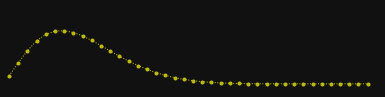

In [55]:
n = np.arange(41)
a, b = 2.7, 9.5
h = stats.beta.pdf(n/40, a, b)
h = h[1:] / sum(h)

#plot_signal(h, color_name='y', filename="h[n]", y_lim=[-0.01, 0.13])
plot_signal(h, color_name='y', y_lim=[-0.01, 0.13])

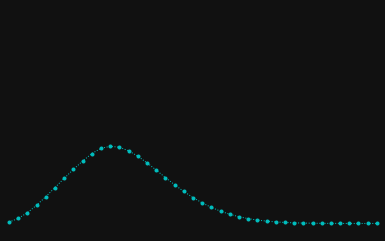

In [11]:
y1 = sig.lfilter(h, 1., x1)

#plot_signal(y1, filename="y1[n]", fig_size=[6,4], y_lim=[-0.1,2.1])
plot_signal(y1, filename="", fig_size=[6,4], y_lim=[-0.1,2.1])

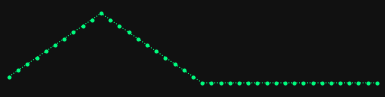

In [12]:
x2 = np.zeros(41)
x2[:21] = sig.triang(21)

#plot_signal(x2, color_name='springgreen', filename="x2[n]")
plot_signal(x2, color_name='springgreen', filename="")

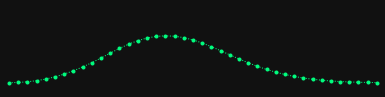

In [17]:
y2 = sig.lfilter(h, 1., x2)

#plot_signal(y2, color_name='springgreen', filename="y2[n]")
plot_signal(y2, color_name='springgreen', filename="")

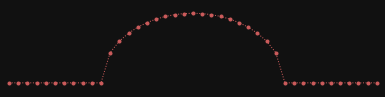

In [15]:
x3 = np.zeros(41)
w = np.arccos((n[:21]-10)/10)
x3[10:31] = np.sin(w)

#plot_signal(x3, color_name='indianred', filename="x3[n]")
plot_signal(x3, color_name='indianred', filename="")

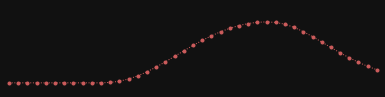

In [18]:
y3 = sig.lfilter(h,1.,x3)

#plot_signal(y3, color_name='indianred', filename="y3[n]")
plot_signal(y3, color_name='indianred', filename="")

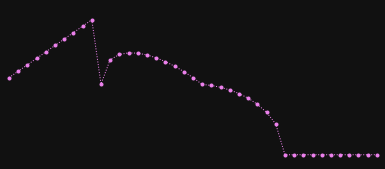

In [19]:
xt = x1+x2+x3
# plot_signal(xt, color_name="violet", filename="xt[n]", fig_size=[6,3], y_lim=[-0.1,2.1])
plot_signal(xt, color_name="violet", filename="", fig_size=[6,3], y_lim=[-0.1,2.1])

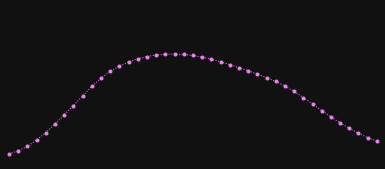

In [20]:
#yt = sig.lfilter(h, 1., x1+x2+x3)
yt = y1+y2+y3

# plot_signal(yt, color_name="violet", filename="yt[n]", fig_size=[6,3], y_lim=[-0.1,2.1])
plot_signal(yt, color_name="violet", filename="", fig_size=[6,3], y_lim=[-0.1,2.1])

## Scaling input and output

In [21]:
def scale_signal(fr, x, p_vals, t_vals, ax_on=True, save_path="", ease_on=True):

  t_sec = fr/fps
  if t_sec > t_vals[-1]:
    # We're at the end of the list, so just hold the last parameter value
    p = p_vals[-1]
    # print("end of list", fr, p) # Debug
  else:
    for k in range(len(t_vals)-1):
      if t_sec >= t_vals[k]:
        if t_sec < t_vals[k+1]:
          # This is the right k, so break
          break
    if ease_on:    
      # Easing: cosine interpolation
      w_1 = np.pi * (t_sec - t_vals[k]) / (t_vals[k+1] - t_vals[k])
      e_1 = 0.5*np.cos(w_1) + 0.5
      e_2 = -0.5*np.cos(-w_1) + 0.5
      p = p_vals[k]*e_1 + p_vals[k+1]*e_2
    else:
      # No easing: linear interp      
      p = ( p_vals[k]*(t_vals[k+1] - t_sec) + p_vals[k+1]*(t_sec - t_vals[k]) ) / (t_vals[k+1] - t_vals[k])
    # print(fr, p) # Debug

  ax.set_frame_on(False)
  if ax_on == False:
      ax.xaxis.set_visible(False)
      ax.yaxis.set_visible(False)
      # turn off axis spines
      # ax.tick_params(colors='white')

  # Plot signal
  line.set_data(n, x*p)
  fig.tight_layout()

  if save_path != "":
      fig.savefig(path + save_path + "/frame%04d.png" % fr, dpi=100, transparent=True)

  return line,

In [ ]:
fps = 30
n = np.arange(41)

fig = plt.figure(figsize=(6,4))
ax = plt.axes(xlim=[-0.2,40.2],ylim=[-0.1,2.2])
line, = ax.plot(n, x1,'co:', markersize=3)
#ax.set_ylim([-0.1, 2.2])
fig.tight_layout()
plt.close()    

ps = [1., 0.5, 2., 1.]
ts = [0, 0.5, 1.5, 2.5]
numFrames = 76
anim = animation.FuncAnimation(fig, scale_signal, frames=numFrames, fargs=(x1,ps,ts,False,"x1[n]_scaled",True), interval=1000/30, blit=True)
anim

In [ ]:
fig = plt.figure(figsize=(6,4))
ax = plt.axes(xlim=[-0.2,40.2],ylim=[-0.1,2.2])
line, = ax.plot(n, x1,'co:',markersize=3)
fig.tight_layout()
plt.close()

ps = [1., 0.5, 2., 1.]
ts = [0, 0.5, 1.5, 2.5]
numFrames = 76
anim = animation.FuncAnimation(fig, scale_signal, frames=numFrames, fargs=(y1,ps,ts,False,"y1[n]_scaled",True), interval=1000/30, blit=True)
anim

# Time invariance

In [24]:
def shift_signal(fr, x, p_vals, t_vals, ax_on=True, save_path="", ease_on=True):

  half_fr = 12 # change every half-second (12 frames)

  if fr % half_fr == 0:
    ax.set_frame_on(False)
    if ax_on == False:
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)

    idx = int(fr / 12)
    N = len(x)
    x_shift = np.zeros(N)
    x_shift[idx:] = x[:N-idx]

    # Plot signal
    line.set_data(n, x_shift)
    fig.tight_layout()

  if save_path != "":
      fig.savefig(path + save_path + "/frame%04d.png" % fr, dpi=100, transparent=True)

  # if fr==num_frames-1:
  #     plt.close()    

  return line,

In [ ]:
fps = 24

fig = plt.figure(figsize=(6,4))
ax = plt.axes(xlim=[-0.2,40.2],ylim=[-0.1,2.1])
line, = ax.plot(n, x1,'co:',markersize=3)
fig.tight_layout()
plt.close()

numFrames = 373

# anim = animation.FuncAnimation(fig, shift_signal, frames=numFrames, fargs=(x1,ps,ts,False,"x[n-k]",True), interval=1000/fps, blit=True)
anim = animation.FuncAnimation(fig, shift_signal, frames=numFrames, fargs=(x1,ps,ts,False,"",True), interval=1000/fps, blit=True)

anim

In [ ]:
fps = 24

fig = plt.figure(figsize=(6,4))
ax = plt.axes(xlim=[-0.2,40.2],ylim=[-0.1,2.1])
line, = ax.plot(n, y1,'co:',markersize=3)
fig.tight_layout()
plt.close()

numFrames = 373

#anim = animation.FuncAnimation(fig, shift_signal, frames=numFrames, fargs=(y1,ps,ts,False,"y[n-k]",True), interval=1000/fps, blit=True)
anim = animation.FuncAnimation(fig, shift_signal, frames=numFrames, fargs=(y1,ps,ts,False,"",True), interval=1000/fps, blit=True)

anim

# Convolution breakdown: $x[m] \cdot h[n-m]$

## $\delta[n]$

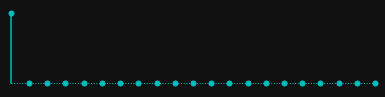

In [31]:
d_n = np.zeros(21)
d_n[0] = 1

fig = plt.figure(figsize=[6,2])
ax = plt.axes(xlim=[-0.2,20.2], ylim=[-0.1,1.1])

ax.plot(d_n,'co',markersize=5,lw=1, color='c')
ax.plot(np.zeros(21),'c:',lw=1)
ax.plot([0,0],[0,d_n[0]],'c-')

ax.set_frame_on(False)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

fig.tight_layout()
# fig.savefig(path + "delta[n].png", dpi=100)

## $h[n]

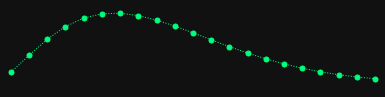

In [32]:
# h defined via above (Beta function)

fig = plt.figure(figsize=[6,2])
ax = plt.axes(xlim=[-0.2,20.2], ylim=[-0.1,1.1])

ax.plot(h[:21]/np.max(h), 'o:', markersize=5, lw=1, color='springgreen')

ax.set_frame_on(False)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

fig.tight_layout()
# fig.savefig(path + "h[n] short.png", dpi=100)

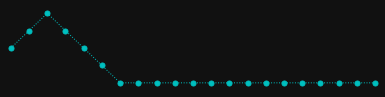

In [34]:
x4 = np.zeros(21)
x4[:6] = [1/2, 3/4, 1, 3/4, 1/2, 1/4]

fig = plt.figure(figsize=[6,2])
ax = plt.axes(xlim=[-0.2,20.2], ylim=[-0.1,1.1])

ax.plot(x4,'o:',markersize=5,lw=1, color='c')
ax.set_frame_on(False)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

fig.tight_layout()
# fig.savefig(path + "x4[n].png", dpi=100)


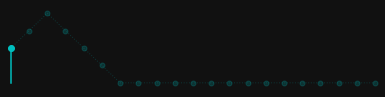

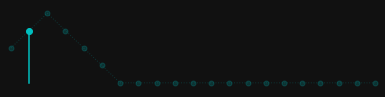

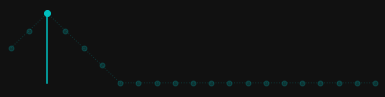

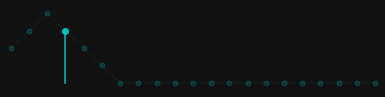

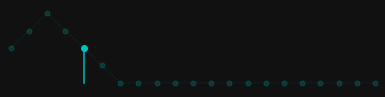

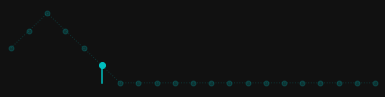

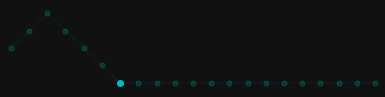

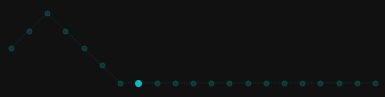

In [ ]:
def stem_x(x, n=0, subdir=""):
  fig = plt.figure(figsize=[6,2])
  ax = plt.axes(xlim=[-0.2,20.2], ylim=[-0.1,1.1])

  ax.plot(x,'o:',markersize=5,lw=1, color='c',alpha=0.2)
  ax.set_frame_on(False)
  ax.xaxis.set_visible(False)
  ax.yaxis.set_visible(False)

  #Stem plot
  ax.plot([n,n],[0,x[n]],'c-')
  ax.plot([n],[x[n]],'co')

  fig.tight_layout()
  fig.savefig(path + subdir + "/frame%04d.png" % n, dpi=100)

x4 = np.zeros(21)
x4[:6] = [1/2, 3/4, 1, 3/4, 1/2, 1/4]

for n in range(8):
  stem_x(x4, n, "x[n-k] stem")

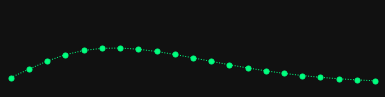

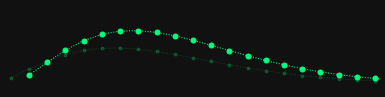

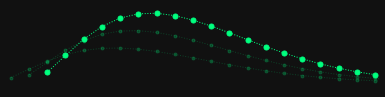

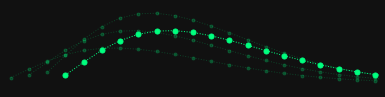

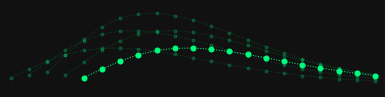

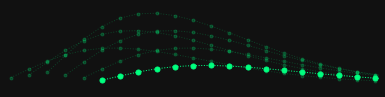

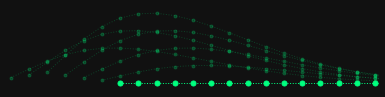

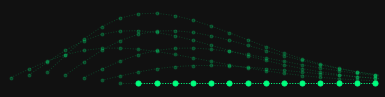

In [ ]:
def shift_h(h, x, n=0, subdir=""):

  fig = plt.figure(figsize=[6,2])
  ax = plt.axes(xlim=[-0.2,20.2], ylim=[-0.1,1.1])

  for n1 in range(n):
    this_n = np.arange(n1,len(h))
    ax.plot(this_n, x[n1]*h[:len(h)-n1],'o:',markersize=3,lw=1, color='springgreen',alpha=0.2)

  ax.set_frame_on(False)
  ax.xaxis.set_visible(False)
  ax.yaxis.set_visible(False)

  #Main plot
  this_n = np.arange(n,len(h))
  ax.plot(this_n, x[n]*h[:len(h)-n],'o:',markersize=5,lw=1, color='springgreen')

  fig.tight_layout()
  fig.savefig(path + subdir + "/frame%04d.png" % n, dpi=100)

for n in range(8):
  shift_h(h/np.max(h), x4, n, "h[n] shift")

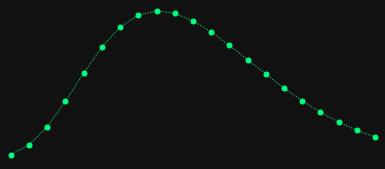

In [35]:
fig = plt.figure(figsize=[6,3])
ax = plt.axes(xlim=[-0.2,20.2], ylim=[-0.1,3.7])

ax.set_frame_on(False)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

#Main plot
y4 = sig.lfilter(h/np.max(h), 1., x4)

ax.plot(y4,'o:',markersize=5,lw=1, color='springgreen')

fig.tight_layout()
# fig.savefig(path + "y4[n].png", dpi=100)

# Convolution Theorem

In [40]:
bt_1sec, fs44 = sf.read(input_path + 'Big Time-1 sec.wav')

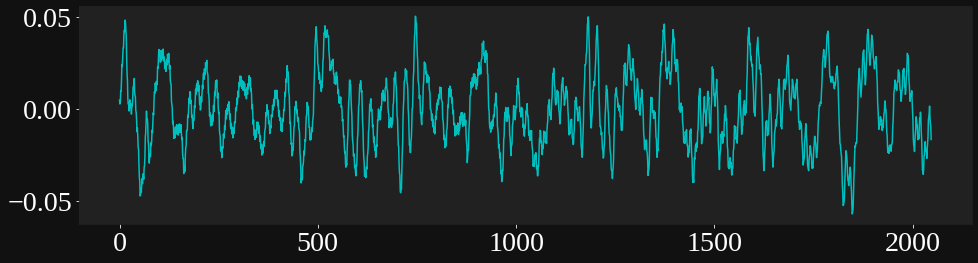

In [41]:
f_size = 2048
bt_2048 = bt_1sec[:f_size]

plt.plot(bt_2048,'c')

## $X(\omega)$

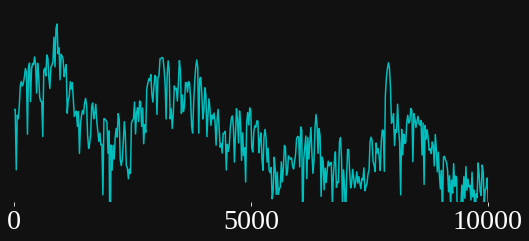

In [42]:
fig = plt.figure(figsize=[8,4])
ax = plt.axes(xlim=[0,10000], ylim=[-50,5])

ax.set_frame_on(False)
# ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

BT = np.fft.fft(bt_2048, 4096)
BT = BT / np.max(np.abs(BT))
BT_abs = np.abs(BT[:1024])
BT_dB = 20 * np.log10(BT_abs)
f_Hz = np.arange(1024)*22050/1024
plt.plot(f_Hz, BT_dB,'c')
ax.set_xticks([0,5000,10000])

fig.tight_layout()
# fig.savefig(path + "X(w).png", dpi=100)

## $H(\omega)$

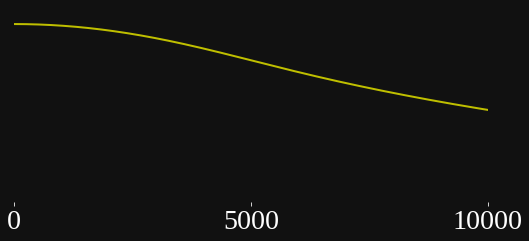

In [54]:
fig = plt.figure(figsize=[8,4])
ax = plt.axes(xlim=[0,10000], ylim=[-50,5])

ax.set_frame_on(False)
ax.yaxis.set_visible(False)

M = 25

h_win = h / sum(h)
w,H = sig.freqz(h_win, 1., worN=2048)
ax.plot(w[:1024]*22050/np.pi, 20*np.log10(np.abs(H[:1024])),'y',lw=2)
ax.set_xticks([0,5000,10000])

fig.tight_layout()
# fig.savefig(path + "H(w).png", dpi=100)

## $Y(\omega)$

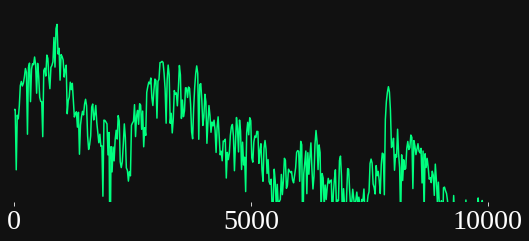

In [45]:
fig = plt.figure(figsize=[8,4])
ax = plt.axes(xlim=[0,10000], ylim=[-50,5])

ax.set_frame_on(False)
ax.yaxis.set_visible(False)

y_bt = H * BT[:2048]
Y_bt = 20*np.log10(np.abs(y_bt))
ax.plot(f_Hz, Y_bt[:1024],color='springgreen')
ax.set_xticks([0,5000,10000])

fig.tight_layout()
# fig.savefig(path + "Y(w).png", dpi=100)

## Convolution: View No. 1 (scaled & shifted impulse responses), $\sum_m x[m]h[n-m]$

In [58]:
M = 25
f_size = 512

# First set up the figure, the axis, and the plot element we want to animate
def setupConvAnimation(x_lim=(-M,f_size+M), y_lim=(-1,1), fig_size=(20,8), hide_y=False, save_figures=False):
  
  fig = plt.figure(figsize=fig_size)
  ax = plt.axes([0.03,0.06,0.94,0.94], xlim=x_lim,ylim=y_lim) # Specify axes location + limits
  
  plt.close()   # Don't output the final figure separately
  windows, = ax.plot([], [], 'y')

  lines = ax.plot( [], [], 'c',
                   [], [], 'c',
                   [], [], 'c', lw=2)   # Signal and periods

  conv, = ax.plot([], [], color='springgreen', lw=2)    # Convolution
  guides = ax.plot( [], [], ':', 
                    [], [], ':',
                    [], [], ':',
                    [], [], ':', color='lightgray',lw=2 )   # Guide lines for convolution

  ax.set_frame_on(False)

  ax.tick_params(length=10,width=2,labelsize=28)
  ax.tick_params(labelbottom=False)  
  ax.axes.get_xaxis().set_visible(False)

  if save_figures==True:
    ax.tick_params(colors='white')
  for tick in ax.get_xticklabels():
      tick.set_fontname("Liberation Serif")

  if hide_y == False: 
    #ax.set_yticks([-100,-50,0])
    for tick in ax.get_yticklabels():
        tick.set_fontname("Liberation Serif")
  else:
    ax.axes.get_yaxis().set_visible(False)

  #fig.tight_layout()
  
  return fig, ax, windows, lines, conv, guides


# initialization function: plot the background of each frame
def initLinearConvAnimation(sig):
    lines[0].set_data(np.arange(len(sig)), sig)

    return lines, 

In [64]:
# animation function, but redraw each frame
def animateConv1(f_num, sig, h_win, conv_sig, x_end, num_frames, sub_dir=''):

    f_skip = 1
    n = f_num*f_skip

    sig_shift = np.append(np.zeros(M), sig)

    h_y_offset = 0.

    # Plot window line
    n_win = np.arange(n,n+M)
    h_win_scaled = h_win * sig[n] # *0.35
    windows.set_data(n_win, h_win_scaled + h_y_offset)
    
    # Remove previous fill objects for window/filter and x[n]*h[n]
    if n > M-2:
      for collection in ax.collections:
        if str(collection.get_label()) == "w_fill":
          collection.remove()
          break

    for collection in ax.collections:
      if str(collection.get_label()) == "xw_fill":
        collection.remove()
      
    w_fill = ax.fill_between(n_win, h_win_scaled + h_y_offset,color='y',alpha=0.1,label="w_fill")
    
    offset1 = -0.25
    M_peak = np.argmax(h_win)

    # line for scaling of impulse response: x[m] * h[n-m]
    guides[1].set_data( [n, n+M_peak], [sig[n], h_win_scaled[M_peak]+h_y_offset] )

    c_n = conv_sig[n]

    if n>0:
      # Plot guiding lines for convolution sum
      guides[0].set_data( [n, n], [h_win_scaled[0]+h_y_offset, c_n + y_offset] )

    # Plot output of convolution, samples and line
    t_out = np.arange(n+1)
    conv.set_data(t_out, conv_sig[:n+1] + y_offset)

    if sub_dir != '':
        fig.savefig(path + sub_dir + '/frame%04d.png' % n, dpi=100, transparent=True)

    return conv, w_fill,

In [ ]:
fps = 30
f_size = 256
M = 25
rt_margin = 100
h_scale = 1
s_scale = 5

frame = s_scale * bt_2048   # bt_2048 defined above
frame = frame[512:768]
frame = np.append(frame, np.zeros(512))
t = np.arange(f_size + M) #/fs
h_win = h[:M] / np.max(h[:M])   # Must normalize peak of h[n] to 1
lin_conv = sig.convolve(h_win / sum(h_win), frame)
lin_conv = np.append(lin_conv, np.zeros(512))

y_offset = -0.5
view_len = 256

fig, ax, windows, lines, conv, guides = setupConvAnimation(x_lim=(-M-10, view_len), y_lim=(-1,1.05), hide_y=True, save_figures=True)
initLinearConvAnimation(frame)

numFrames = 284

#anim = animation.FuncAnimation(fig, animateConv1, frames=numFrames, fargs=(frame,h_win,lin_conv,view_len,numFrames,'conv1_animation'), interval=1000/fps, blit=True)
anim = animation.FuncAnimation(fig, animateConv1, frames=numFrames, fargs=(frame,h_win,lin_conv,view_len,numFrames,''), interval=1000/fps, blit=True)

anim

## Convolution: View No. 2 (time-reversed impulse response), $\sum_{m}x[m]h[-(m-n)]$



In [67]:
# animation function, but redraw each frame
def animateConv2(f_num, sig, h_win, conv_sig, x_end, num_frames, sub_dir=''):

    f_skip = 2
    if f_num < 0:
      n = f_num
    else:
      n = (f_num)*f_skip

    h_win_scaled = h_win #* 0.35   # Magic scaling factor

    sig_shift = np.append(np.zeros(M), sig)
    sig_shift = np.append(sig_shift, np.zeros(100))

    if n-M+1 > 0:
      # "Left" side of signal (before window)
      n1 = np.arange( 0, n-M+1 )
      lines[0].set_data(n1, sig[:n-M+1])

    # "Right" side of signal
    n2 = np.arange(max(n,0), x_end)
    lines[2].set_data(n2, sig[max(n,0):x_end])

    h_y_offset = 0.

    # Plot window line
    if n == -2:
      # Reverse window (to show h[n] initially, not h[-n])
      n_win = np.arange(0,M)
      h_win_scaled = h_win_scaled[::-1]
    elif n == -1:
      n_win = np.arange(-M+1,1)
    else:
      n_win = np.arange(n-M+1,n+1)

    windows.set_data(n_win, h_win_scaled + h_y_offset)
 
    if n > 0:
      # x[n]h[n] outline
      lines[1].set_data(n_win, h_win * sig_shift[n:n+M])
      lines[1].set_color('#55C898')
    
    # Remove previous fill objects for window/filter and x[n]*h[n]
    for collection in ax.collections:
      if str(collection.get_label()) == "w_fill":
        collection.remove()

    for collection in ax.collections:
      if str(collection.get_label()) == "xw_fill":
        collection.remove()
      
    w_fill = ax.fill_between(n_win, h_win_scaled + h_y_offset,color='y',alpha=0.1,label="w_fill")
    
    if n > 0:
      xw_fill = ax.fill_between(n_win, h_win * sig_shift[n:n+M] + h_y_offset,color='#657748',alpha=1.,label="xw_fill")
    else:
      xw_fill = ax.fill_between([0,0], [0,0],label="xw_fill")

    offset1 = -0.25

    if n>0:
      c_n = conv_sig[n]
      # Plot guiding lines for window boundaries
      guides[0].set_data( [n-M+1, n-M+1], [h_win[0]+h_y_offset, offset1] )
      guides[1].set_data( [n, n], [h_win[-1]+h_y_offset, c_n + y_offset] )

      # Plot output of convolution, samples and line
      t_out = np.arange(n+1)
      conv.set_data(t_out, conv_sig[:n+1] + y_offset)

      # Plot guiding lines for convolution sum
      guides[2].set_data( [n-M+1, t_out[-1]], [offset1, c_n + y_offset ] )

    if sub_dir != '':
        fig.savefig(path + sub_dir + '/frame%04d.png' % n, dpi=100, transparent=True)

    return conv, w_fill, xw_fill,

In [ ]:
fps = 30
f_size = 256
M = 25
rt_margin = 100
h_scale = 4 / sum(h)
s_scale = 5 # scaling for visual height

frame = s_scale * bt_2048
frame = frame[512:768]
frame = np.append(frame, np.zeros(M))   # Zero-pad signal for extra frames

h_win = h[:M] * h_scale
lin_conv = sig.convolve(h_win / sum(h_win), frame)
lin_conv = np.append(lin_conv, np.zeros(512))

h_win = h_win[::-1]       # Reverse window for this view

y_offset = -0.5
view_len = 256

fig, ax, windows, lines, conv, guides = setupConvAnimation(x_lim=(-M-10, view_len), y_lim=(-1,1.05), hide_y=True, save_figures=True)

numFrames = 142

#anim = animation.FuncAnimation(fig, animateConv2, frames=numFrames, fargs=(frame, h_win, lin_conv,view_len,numFrames,'conv_animation'), interval=1000/fps, blit=True)
anim = animation.FuncAnimation(fig, animateConv2, frames=numFrames, fargs=(frame, h_win, lin_conv,view_len,numFrames,''), interval=1000/fps, blit=True)

anim


# Ideal LPF animations



In [ ]:
rc('mathtext', fontset='cm')

fig = plt.figure(figsize=(20,6))
w_c = np.pi/4
pi2 = 2*np.pi

x = [-6.5,-pi2+w_c,-pi2+w_c,-w_c,-w_c,w_c,w_c,pi2-w_c,pi2-w_c,6.5]
y = [1,1,0,0,1,1,0,0,1,1]

# animation function, but redraw each frame
def animate(n, num_frames, ax_on=True, save_figs=False):
    fig.clear() 
    ax = plt.axes([0.02,0.14,0.96,0.86])

    ax.set_xticks([-pi2, -np.pi, -w_c, 0, w_c, np.pi, pi2])
    ax.set_xticklabels(['$2\pi$','$-\pi$','$-\omega_c$',r'$0$','$\omega_c$','$\pi$','$2\pi$'])

    ax.set_xlim(-n/48*np.pi, np.pi)
    ax.set_ylim(-0.1, 1.1)   
        
    ax.tick_params(length=10,width=2,labelsize=48)

    ax.set_frame_on(False)
    ax.yaxis.set_visible(False)
    if ax_on == False:
        # turn off axis spines
        ax.tick_params(colors='white')

    # Plot signal
    plt.plot(x, y,'y',lw=4)

    # fig.tight_layout()

    if save_figs==True:
        fig.savefig(path + "Ideal LPF/frame%04d.png" % n, dpi=100, transparent=True)

    if n==num_frames-1:
        plt.close()    

    return line,

numFrames = 49
save_figures = False
anim = animation.FuncAnimation(fig, animate, frames=numFrames, fargs=(numFrames,False,save_figures), interval=1000/30, blit=True)
anim

In [ ]:
fig = plt.figure(figsize=(20,6))
w_c = np.pi/4
pi2 = 2*np.pi

x = [-6.5,-pi2+w_c,-pi2+w_c,-w_c,-w_c,w_c,w_c,pi2-w_c,pi2-w_c,6.5]
y = [1,1,0,0,1,1,0,0,1,1]

# animation function, but redraw each frame
def animate(n, num_frames, ax_on=True, save_figs=False):
    fig.clear() 
    ax = plt.axes([0.02,0.14,0.96,0.86])

    ax.set_xticks([-pi2, -np.pi, -w_c, 0, w_c, np.pi, pi2])
    ax.set_xticklabels([r'$2\pi$',r'$-\pi$',r'$-\omega_c$',r'0',r'$\omega_c$',r'$\pi$',r'$2\pi$'])
    ax.set_xlim(-(1+n/48)*np.pi,(1+n/48)*np.pi)
    ax.set_ylim(-0.1, 1.1)   

    ax.tick_params(length=10,width=2,labelsize=48)
    ax.set_frame_on(False)
    ax.yaxis.set_visible(False)

    if ax_on == False:
        ax.tick_params(colors='white')

    # Plot signal
    plt.plot(x, y,'y',lw=4)

    if save_figs==True:
        fig.savefig(path + "Ideal LPF-2/frame%04d.png" % n, dpi=100, transparent=True)

    if n==num_frames-1:
        plt.close()    

    return line,

numFrames = 49
save_figures = False
anim = animation.FuncAnimation(fig, animate, frames=numFrames, fargs=(numFrames,False,save_figures), interval=1000/24, blit=True)
anim

## Sinc function

In [ ]:
rc('font',**{'family':'serif','serif':['Liberation Serif']})

In [ ]:
f_c = 5168

N_2 = 64
t = np.arange(-N_2, N_2)/fs44
h_ideal = np.sin(2*np.pi*f_c*t) / (2*np.pi*f_c*t)


In [ ]:
w_c = 5168/22050 * np.pi
print(w_c)

0.7363152305556485


In [ ]:
fig = plt.figure(figsize=(20,6))
# w_c = np.pi/4
pi2 = 2*np.pi

n_t = np.arange(0,2000)/10
n_t = n_t[1:-1]   # Get rid of zero
n_t = np.append(-np.flipud(n_t),n_t)


# animation function, but redraw each frame
def animate_sinc(n, num_frames, ax_on=True, save_figs=False):
    fig.clear()
    ax = plt.axes([0.02,0.1,0.96,0.9])
    #ax = plt.axes(xlim=(-200,200), ylim=(-0.1,0.3))

    ax.set_xticks(np.arange(-200,201,40))
    ax.tick_params(length=10,width=2,labelsize=28)
    ax.set_frame_on(False)
    ax.yaxis.set_visible(False)

    # Plot signal
    plt.plot(n_t, np.sin(n_t*w_c)/(np.pi*n_t),'y',lw=4)

    ax.set_xlim(-(1+n/15)*40,(1+n/15)*40)
    ax.tick_params(colors='white')

    # fig.tight_layout()

    if save_figs==True:
        fig.savefig(path + "sinc/frame%04d.png" % n, dpi=100, transparent=True)

    if n==num_frames-1:
        plt.close()    

    return line,

numFrames = 61
save_figures = False

anim = animation.FuncAnimation(fig, animate_sinc, frames=numFrames, fargs=(numFrames,True,save_figures), interval=1000/30, blit=True)
anim

In [ ]:
fig = plt.figure(figsize=(20,6))

# animation function, but redraw each frame
def animate_sinc2(n, num_frames, ax_on=True, save_figs=False):
    fig.clear()
    ax = plt.axes([0.02,0.1,0.96,0.9])
    #ax = plt.axes(xlim=(-200,200), ylim=(-0.1,0.3))

    ax.set_xticks(np.arange(-200,201,40))
    ax.tick_params(length=10,width=2,labelsize=28)
    ax.set_frame_on(False)
    ax.yaxis.set_visible(False)

    # Plot signal
    plt.plot(n_t + 64*n/30, np.sin(n_t*w_c)/(np.pi*n_t),'y',lw=4)

    # ax.set_xlim(-(1+n/15)*40,(1+n/15)*40)
    ax.set_xlim(-200+n*20/3, 200-n*2.4) # Should end on [0, 128]
    ax.tick_params(colors='white')

    # fig.tight_layout()

    if save_figs==True:
        fig.savefig(path + "sinc2/frame%04d.png" % n, dpi=100, transparent=True)

    if n==num_frames-1:
        plt.close()    

    return line,

numFrames = 31
save_figures = False

anim = animation.FuncAnimation(fig, animate_sinc2, frames=numFrames, fargs=(numFrames,True,save_figures), interval=1000/30, blit=True)
anim

# Frequency Domain filtering: Bach B-minor *Gloria*

In [72]:
gloria23, fs44 = sf.read(input_path + 'Gloria-R23.wav')
ipd.Audio(gloria23, rate=fs44)

## Sinc lowpass filter

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


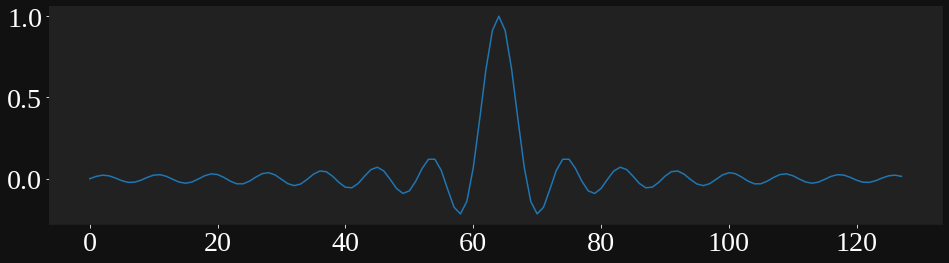

In [73]:
f_c = 5168    # Cutoff frequency in Hz

N_2 = 64
t = np.arange(-N_2, N_2)/fs44
h_ideal = np.sin(2*np.pi*f_c*t) / (2*np.pi*f_c*t)
h_ideal[N_2] = 1
plt.plot(h_ideal)

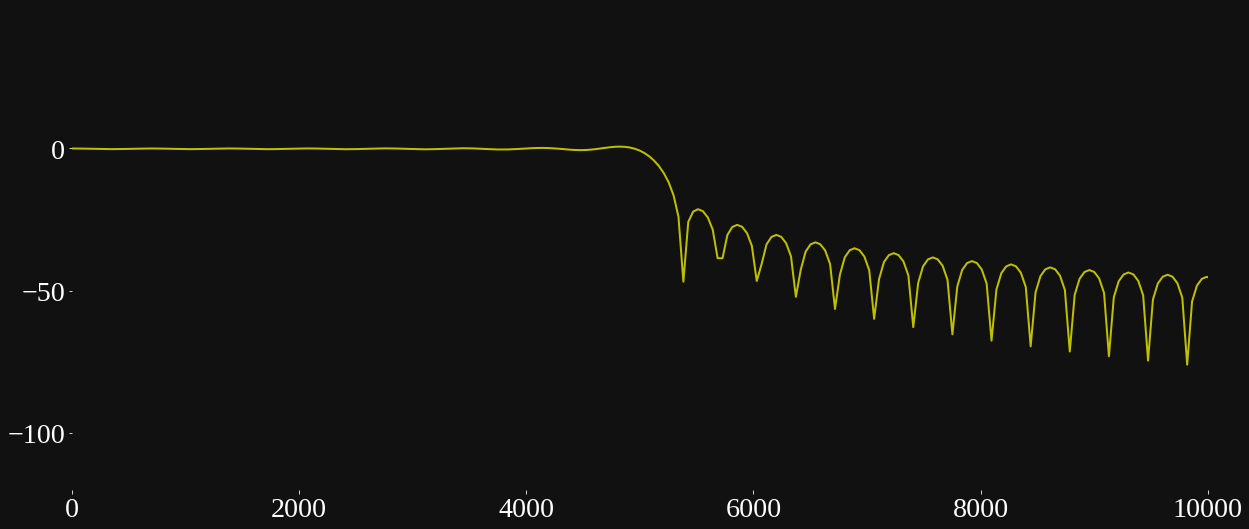

In [75]:
fig = plt.figure(figsize=(18,8))
ax = plt.axes(xlim=(0,10000), ylim=(-120,50))

w,H_sinc = sig.freqz(h_ideal/np.sum(h_ideal), 1.)
ax.plot(22050*w/np.pi, 20*np.log10(np.abs(H_sinc)),'y', lw=2)
ax.set_frame_on(False)
plt.yticks([-100,-50,0])
fig.tight_layout()
# fig.savefig(path + 'H(w) overlay.png', dpi=100)

In [ ]:
fig = plt.figure(figsize=(16,5))

# animation function, but redraw each frame
def animate_dB(n, num_frames, ax_on=True, save_figs=False):
    fig.clear()
    ax = plt.axes([0.05,0.1,0.93,0.9])
    ax.set_frame_on(False)

    # Plot signal
    plt.plot(22050*w/np.pi, (1 - n/30)*np.abs(H_sinc) + 20*(n**3/27000)*np.log10(np.abs(H_sinc)),'y', lw=2)
    plt.ylim([ - 1 + (np.cos(np.pi* n/30) - 1)*n, 1.2 + 3.8*(n/30)])

    if n==0:
      plt.yticks([0,1.])
    elif n<30:
      plt.yticks([])
    elif n==30:
      plt.yticks([-60,-30,0])

    ax.tick_params(colors='white', labelsize=20)

    if save_figs==True:
        fig.savefig(path + "H_windowed_sinc/frame%04d.png" % n, dpi=100, transparent=True)

    if n==num_frames-1:
        plt.close()    

    return line,

# numFrames = 61
numFrames = 31
save_figures = False
anim = animation.FuncAnimation(fig, animate_dB, frames=numFrames, fargs=(numFrames,True,save_figures), interval=1000/30, blit=True)
anim

In [ ]:
gloria_sinc = sig.lfilter(h_ideal/np.sum(h_ideal), 1., gloria23)
plt.plot(gloria_sinc)
ipd.Audio(gloria_sinc, rate=fs44)

## Gloria sinc lowpass FFT

In [ ]:
fps = 30
numFrames = 300
save_figures = False

fig, line = setupFFTanimation(x_lim=(0,10000), y_lim=(-120,50), fig_size=(18,8))
anim = animation.FuncAnimation(fig, animateFFT, init_func=initFFTanimation, frames=range(300,360), fargs=(gloria_mix/np.max(np.abs(gloria_mix)), save_figures, 'Gloria_H1'), interval=1000/fps, blit=True)
anim

## Gloria $X[k]H[k]$ "filtering"

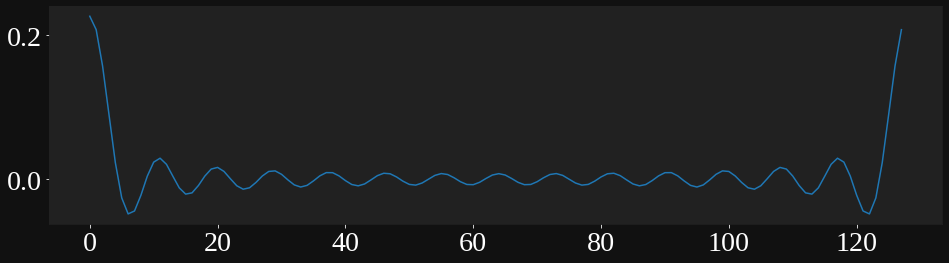

In [79]:
N = 128

H = np.zeros(N)
H[:15] = 1
H[-14:] = 1

h_test = np.fft.ifft(H)
plt.plot(np.real(h_test))

In [80]:
def fft_filter(x, H):
  # N = 1024
  N_hop = N #int(N/2)
  fStart = 0
  fEnd = N
  L = len(x)
  y = np.zeros(L + N)

  # Trapezoid filter to remove the extreme edge effects
  B_2 = 24 # 5 sample ramp up and down
  B = sig.windows.bartlett(2*B_2)
  W = np.ones(N)
  W[:B_2] = B[:B_2]
  W[-B_2:] = B[-B_2:]

  while fEnd < L:
#    x_frame = np.zeros(N*2)
    x_frame = x[fStart:fEnd] * W #* sig.windows.bartlett(N)
    X = np.fft.fft(x_frame)
    Y = X * H
    y_frame = np.real( np.fft.ifft(Y) ) #* sig.windows.hann(N)
    # plt.plot(x_frame)
    # plt.plot(y_frame)
    y[fStart:fEnd] += y_frame

    fStart += N_hop
    fEnd += N_hop

  return y

gloria_FFT = fft_filter(gloria23, H)

In [ ]:
plt.plot(gloria_FFT)
ipd.Audio(gloria_FFT, rate=fs44)

## Gloria frequency-domain filtering FFT animation

In [ ]:
numFrames = 690
save_figures = False

fig, line = setupFFTanimation(x_lim=(0,10000), y_lim=(-140,50), fig_size=(18,8))
anim = animation.FuncAnimation(fig, animateFFT, init_func=initFFTanimation, frames=numFrames, fargs=(gloria_mix2, save_figures, 'Gloria_H2'), interval=1000/fps, blit=True)
anim